# AMAZON SALES DATA ANALYSIS

# Importing Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Import dataset:**

In [2]:
sales_data=pd.read_csv("SALESDATA.xlsx - AmazonFoodCategory_1 Dataset.csv")

In [3]:
sales_data.head()

,Custkey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10016609,12/31/2019,398.73,2019/12/31,329568,P01,15640,Super Vegetable Oil,1000,163.47,122380,12/31/2019,418.62,817.35,102.99,315.63,83.72400,5,176,EA
1,10016609,12/31/2019,268.67,2019/12/31,329569,P01,31681,Golden Fajita French Fries,7000,275.37,123966,12/31/2019,282.07,550.74,117.45,164.62,141.03500,2,176,EA
2,10016609,12/31/2019,398.73,2019/12/31,329569,P01,15640,Super Vegetable Oil,4000,163.47,123966,12/31/2019,418.62,817.35,102.99,315.63,83.72400,5,176,EA
3,10016609,12/31/2019,466.45,2019/12/31,329569,P01,13447,High Top Oranges,3000,119.52,123966,12/31/2019,489.71,956.16,213.29,276.42,61.21375,8,176,EA
4,10016609,12/31/2019,515.51,2019/12/31,329569,P01,36942,Tell Tale New Potatos,9000,264.18,123966,12/31/2019,541.21,1056.72,290.56,250.65,135.30250,4,176,EA


In [4]:
#checking the shape
sales_data.shape

(65280, 20)

Observation:
we have 65282 records and 20 columns in the dataset.

In [5]:
# Let's see the columns name
sales_data.columns

Index(['Custkey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           65280 non-null  int64  
 1   DateKey                           65280 non-null  object 
 2   Discount Amount                   65278 non-null  float64
 3   Invoice Date                      65280 non-null  object 
 4   Invoice Number                    65280 non-null  int64  
 5   Item Class                        56995 non-null  object 
 6   Item Number                       65240 non-null  object 
 7   Item                              65280 non-null  object 
 8   Line Number                       65280 non-null  int64  
 9   List Price                        65280 non-null  float64
 10  Order Number                      65280 non-null  int64  
 11  Promised Delivery Date            65280 non-null  object 
 12  Sale

Observation:
In the information of the dataset we got to know the number of columns, columns name and the data type of the columns.

In [7]:
# Checking for any missing values
sales_data.isnull().sum()

Custkey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8285
Item Number                           40
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

Observation:
Here we got see that some of the columns having the missing values like Discount Amount has 2 missing values, Item class has 8289, Item Number has 41 and 1 in the sales price.

In [8]:
sales_data['Invoice Date'] = pd.to_datetime(sales_data['Invoice Date'])

In [9]:
sales_data1 = sales_data.copy()

In [10]:
sales_data1['Item Class'].value_counts()

P01    56965
PO1       16
P02        1
P12        1
P13        1
P06        1
P15        1
P11        1
P08        1
P07        1
P10        1
P09        1
P14        1
P03        1
P05        1
P04        1
Name: Item Class, dtype: int64

In [11]:
#generating descriptive statistics
sales_data1.describe().round()

,Custkey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,65280.0,65278.0,65280.0,65280.0,65280.0,65280.0,65280.0,65280.0,65280.0,65280.0,65279.0,65280.0,65280.0
mean,10017703.0,1856.0,216227.0,23715.0,515.0,180582.0,2852.0,4708.0,1661.0,1191.0,284.0,45.0,137.0
std,7176.0,9037.0,94992.0,32664.0,449.0,67595.0,15165.0,20697.0,9557.0,5861.0,253.0,430.0,27.0
min,10000453.0,-255821.0,100080.0,1000.0,0.0,100838.0,200.0,0.0,0.0,-3933.0,-5000.0,-1.0,103.0
25%,10012715.0,246.0,117931.0,3000.0,182.0,115320.0,308.0,561.0,168.0,130.0,100.0,2.0,113.0
50%,10019665.0,442.0,222870.0,12000.0,325.0,203702.0,554.0,998.0,305.0,246.0,184.0,3.0,134.0
75%,10023511.0,1000.0,314319.0,32000.0,804.0,218576.0,1280.0,2317.0,687.0,580.0,448.0,8.0,160.0
max,10027583.0,343533.0,332842.0,344000.0,2761.0,321532.0,555376.0,632610.0,366576.0,188800.0,6035.0,16000.0,185.0


In [12]:
# Creating Year, Month, Quarter, Day Columns in sales_data1
# Here I'm creating new columns with help of the Invoice Date columns, where
# it contain the yyyy/mm/dd formate
sales_data['Invoice Date'] = pd.to_datetime(sales_data['Invoice Date'])
sales_data1['Invoice_Year'] = sales_data['Invoice Date'].dt.year
sales_data1['Invoice_Month'] = sales_data['Invoice Date'].dt.month
sales_data1['Invoice_Quarter'] = sales_data['Invoice Date'].dt.quarter
sales_data1['Invoice_Day'] = sales_data['Invoice Date'].dt.day

In [13]:
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           65280 non-null  int64         
 1   DateKey                           65280 non-null  object        
 2   Discount Amount                   65278 non-null  float64       
 3   Invoice Date                      65280 non-null  datetime64[ns]
 4   Invoice Number                    65280 non-null  int64         
 5   Item Class                        56995 non-null  object        
 6   Item Number                       65240 non-null  object        
 7   Item                              65280 non-null  object        
 8   Line Number                       65280 non-null  int64         
 9   List Price                        65280 non-null  float64       
 10  Order Number                      65280 non-nu

In [14]:
print(sales_data1.columns)
print('Custkey' in sales_data1.columns)





Index(['Custkey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', 'Invoice_Year', 'Invoice_Month', 'Invoice_Quarter',
       'Invoice_Day'],
      dtype='object')
True


In [15]:
# Creating DataFrame only with necessary values. 
# Considering the data which is realted to sales.

sales_data2 = sales_data1[['Custkey', 'Item','Invoice Date','Invoice_Year','Invoice_Quarter','Invoice_Month','Invoice_Day',
                          'Sales Quantity','Sales Amount','Sales Amount Based on List Price','Discount Amount','Sales Margin Amount',
                          'Sales Cost Amount','Sales Rep','U/M','List Price','Sales Price']]

In [16]:
sales_data2.isnull().sum()

Custkey                             0
Item                                0
Invoice Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales Quantity                      0
Sales Amount                        0
Sales Amount Based on List Price    0
Discount Amount                     2
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         1
dtype: int64

In [17]:
# removing the null values from the columns.

sales_data2.dropna(subset=['Discount Amount','Sales Price'], axis=0,inplace= True)

C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\1755906907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data2.dropna(subset=['Discount Amount','Sales Price'], axis=0,inplace= True)


In [18]:
sales_data2.isnull().sum()

Custkey                             0
Item                                0
Invoice Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales Quantity                      0
Sales Amount                        0
Sales Amount Based on List Price    0
Discount Amount                     0
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         0
dtype: int64

In [19]:
sales_data2.head()

,Custkey,Item,Invoice Date,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,U/M,List Price,Sales Price
0,10016609,Super Vegetable Oil,2019-12-31,2019,4,12,31,5,418.62,817.35,398.73,315.63,102.99,176,EA,163.47,83.72400
1,10016609,Golden Fajita French Fries,2019-12-31,2019,4,12,31,2,282.07,550.74,268.67,164.62,117.45,176,EA,275.37,141.03500
2,10016609,Super Vegetable Oil,2019-12-31,2019,4,12,31,5,418.62,817.35,398.73,315.63,102.99,176,EA,163.47,83.72400
3,10016609,High Top Oranges,2019-12-31,2019,4,12,31,8,489.71,956.16,466.45,276.42,213.29,176,EA,119.52,61.21375
4,10016609,Tell Tale New Potatos,2019-12-31,2019,4,12,31,4,541.21,1056.72,515.51,250.65,290.56,176,EA,264.18,135.30250


In [20]:
sales_data2.tail()

,Custkey,Item,Invoice Date,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,U/M,List Price,Sales Price
65275,10025919,Best Choice Graham Crackers,2017-01-01,2017,1,1,1,1,563.61,1029.9800,466.3700,250.68,312.93,108,EA,1029.9800,563.61
65276,10009985,Red Spade Foot-Long Hot Dogs,2017-01-01,2017,1,1,1,1,843.87,1627.8400,783.9700,368.12,475.75,173,EA,1627.8400,843.87
65277,10025552,Atomic Mint Chocolate Bar,2017-01-01,2017,1,1,1,3,2453.04,3762.5697,1309.5297,1420.21,1032.83,180,EA,1254.1899,817.68
65278,10025025,Just Right Canned Tuna in Water,2017-01-01,2017,1,1,1,1,269.07,491.7200,222.6500,109.93,159.14,143,EA,491.7200,269.07
65279,10022750,High Top Sweet Onion,2017-01-01,2017,1,1,1,1,228.25,408.5200,180.2700,91.68,136.57,108,SE,408.5200,228.25


C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\1766468121.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_data2.corr(),annot=True)


<Axes: >

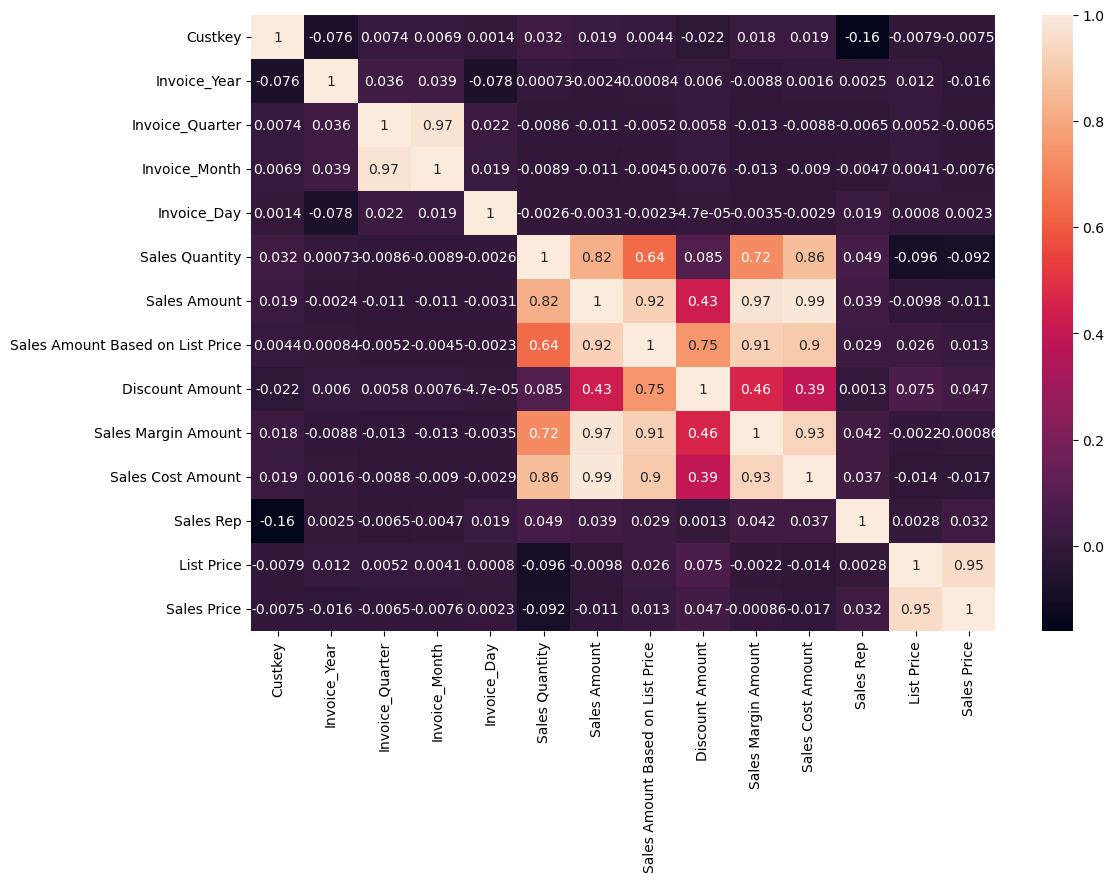

In [21]:
#Checking the correlation

plt.figure(figsize=(12,8))
sns.heatmap(sales_data2.corr(),annot=True)

Observations:

1- Discount Amount is highly related to Sales Amount, Sales Cost Amount, Sales Amount Based on List Price & Sales Margin Amount and moderately related to Sales Quantity.

2- List Price highly related to sales price and has no relations with Sales amount, Sales cost amount, Sales amount based on list price & sales margin amount.

3- Sales quantity is moderately related to Sales amount, discount amount, sales margin amount.

4- Their is no relation Between Sales Rep and Sales Amount, Sales Margin Amount.

In [22]:
sales_data2.head()

,Custkey,Item,Invoice Date,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,U/M,List Price,Sales Price
0,10016609,Super Vegetable Oil,2019-12-31,2019,4,12,31,5,418.62,817.35,398.73,315.63,102.99,176,EA,163.47,83.72400
1,10016609,Golden Fajita French Fries,2019-12-31,2019,4,12,31,2,282.07,550.74,268.67,164.62,117.45,176,EA,275.37,141.03500
2,10016609,Super Vegetable Oil,2019-12-31,2019,4,12,31,5,418.62,817.35,398.73,315.63,102.99,176,EA,163.47,83.72400
3,10016609,High Top Oranges,2019-12-31,2019,4,12,31,8,489.71,956.16,466.45,276.42,213.29,176,EA,119.52,61.21375
4,10016609,Tell Tale New Potatos,2019-12-31,2019,4,12,31,4,541.21,1056.72,515.51,250.65,290.56,176,EA,264.18,135.30250


In [23]:
sales_data2.shape

(65278, 17)

In [24]:
sales_data2.Item.value_counts()

Better Fancy Canned Sardines    1648
Ebony Prepared Salad            1471
Moms Sliced Turkey              1192
Imagine Popsicles               1191
Discover Manicotti              1126
                                ... 
BBB Best Corn Oil                  1
Choice Bubble Gum                  1
Atomic White Chocolate Bar         1
Tell Tale Potatos                  1
Discover Rice Medly                1
Name: Item, Length: 657, dtype: int64

Observation:
Highest number of sold Item is 'Better Fancy Canned Sardines'
Top 5 Items sold are:
1.Better Fancy Canned Sardines    1648
2.Ebony Prepared Salad            1471
3.Moms Sliced Turkey              1192
4.Imagine Popsicles               1191
5.Discover Manicotti              1126

In [25]:
sales_data2.describe()

,Custkey,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price
count,6.527800e+04,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000,65278.000000
mean,1.001770e+07,2017.960936,2.414259,6.307056,16.155856,45.087028,2852.123155,4707.751960,1855.628805,1191.042148,1661.081006,137.422792,514.721549,283.700703
std,7.176028e+03,0.946607,1.160969,3.563597,8.795197,429.674817,15164.794439,20697.047218,9037.273883,5860.944907,9556.769198,26.643590,449.187911,252.034171
min,1.000045e+07,2017.000000,1.000000,1.000000,1.000000,1.000000,200.010000,0.000000,-255820.800000,-3932.930000,0.000000,103.000000,0.000000,0.337341
25%,1.001272e+07,2017.000000,1.000000,3.000000,9.000000,2.000000,308.410000,561.040000,246.067500,129.942500,167.810000,113.000000,181.560000,100.070000
50%,1.001966e+07,2018.000000,2.000000,6.000000,16.000000,3.000000,553.970000,998.160000,441.760000,246.490000,304.560000,134.000000,325.190000,183.758250
75%,1.002351e+07,2019.000000,3.000000,9.000000,24.000000,8.000000,1280.042500,2319.810000,999.760000,579.530000,687.400000,160.000000,803.860000,448.220000
max,1.002758e+07,2019.000000,4.000000,12.000000,31.000000,16000.000000,555376.000000,632610.160000,343532.660000,188800.000000,366576.000000,185.000000,2760.700000,6035.000000


In [26]:
sales_data2[[ 'List Price','Sales Price','Sales Amount Based on List Price','Sales Amount','Discount Amount']].head(16)

,List Price,Sales Price,Sales Amount Based on List Price,Sales Amount,Discount Amount
0,163.4700,83.724000,817.3500,418.62,398.7300
1,275.3700,141.035000,550.7400,282.07,268.6700
2,163.4700,83.724000,817.3500,418.62,398.7300
3,119.5200,61.213750,956.1600,489.71,466.4500
4,264.1800,135.302500,1056.7200,541.21,515.5100
5,451.3100,231.142500,3610.4800,1849.14,1761.3400
6,927.9700,475.270000,3711.8800,1901.08,1810.8000
7,39.1545,37.588276,6812.8830,6540.36,272.5230
8,38.5506,37.008566,9946.0548,9548.21,397.8448
9,40.3128,38.700294,13706.3520,13158.10,548.2520


Observation:
Discount Amount = (Sales Amount Based on List Price - Sales Amount)

Yearly Sales Record:

In [27]:
Yearly_Sales =  sales_data2[['Custkey','Item','Invoice Date','Invoice_Year','Invoice_Month',
                            'Sales Quantity', 'Sales Amount Based on List Price','Discount Amount',
                           'Sales Amount', 'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price',
                           'Sales Price']]

In [28]:
monthly_yearly_sales = Yearly_Sales.groupby(['Invoice_Year' , 'Invoice_Month']).sum().reset_index()
monthly_yearly_sales['Year_Month'] = monthly_yearly_sales['Invoice_Year'].astype(str) + "-" + monthly_yearly_sales['Invoice_Month'].astype(str)
monthly_yearly_sales[['Year_Month' , 'Invoice_Year' , 'Invoice_Month' , 'Sales Amount']]

C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\454274220.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_yearly_sales = Yearly_Sales.groupby(['Invoice_Year' , 'Invoice_Month']).sum().reset_index()


,Year_Month,Invoice_Year,Invoice_Month,Sales Amount
0,2017-1,2017,1,8650450.48
1,2017-2,2017,2,7216327.65
2,2017-3,2017,3,7567525.47
3,2017-4,2017,4,5650633.87
4,2017-5,2017,5,5988460.88
5,2017-6,2017,6,8669182.00
6,2017-7,2017,7,6391727.78
7,2017-8,2017,8,7748975.68
8,2017-9,2017,9,8786342.38
9,2017-10,2017,10,6368884.91


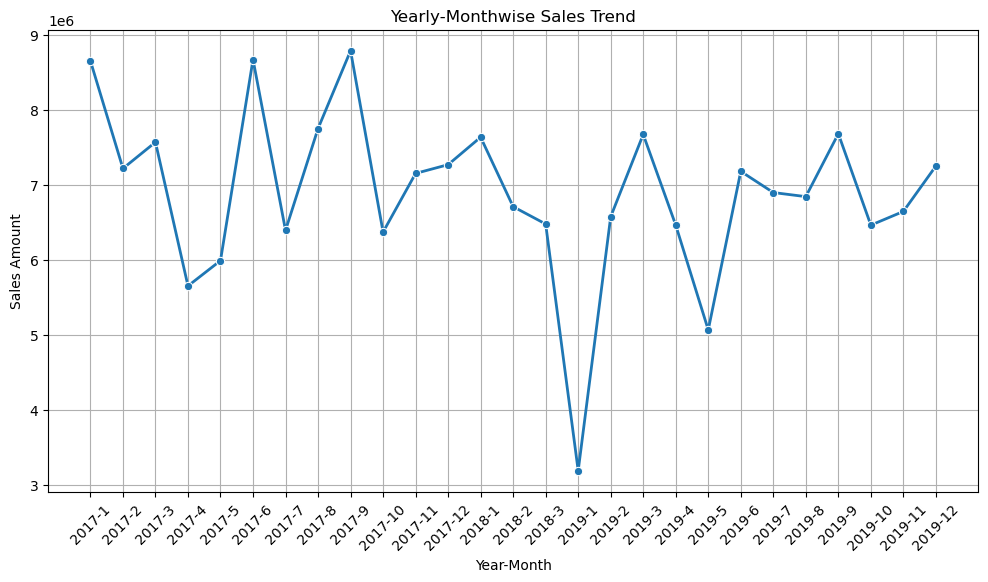

In [29]:


# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_yearly_sales, x="Year_Month", y="Sales Amount", marker="o", linewidth=2)

# Improve visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Year-Month")
plt.ylabel("Sales Amount")
plt.title("Yearly-Monthwise Sales Trend")
plt.grid(True)  # Add grid for better readability

# Show plot
plt.show()


Obseravtions:
From this plot, it is clear that Sales decreased continuously & then it started to increase from 2018 to 2019.

C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\1007244610.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Yearly_Sales01 = Yearly_Sales.groupby('Invoice_Year' , as_index = False).sum().sort_values(by='Sales Amount',ascending = False)


,Invoice_Year,Sales Amount
0,2017,87456832.63
2,2019,77906591.65
1,2018,20817471.00


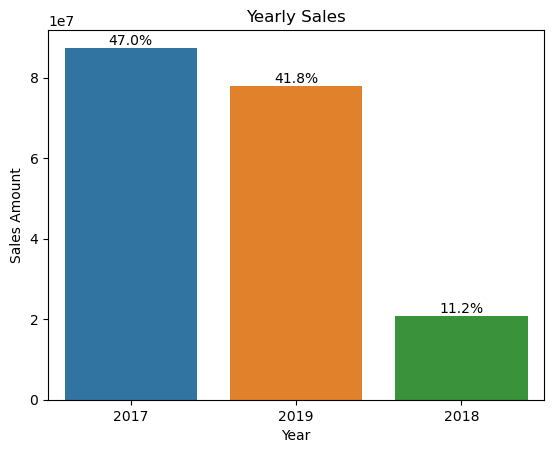

In [30]:
Yearly_Sales01 = Yearly_Sales.groupby('Invoice_Year' , as_index = False).sum().sort_values(by='Sales Amount',ascending = False)
ax=sns.barplot(y = 'Sales Amount', x = 'Invoice_Year', data = Yearly_Sales01 , order=Yearly_Sales01.Invoice_Year)
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Yearly Sales')
total_sales = Yearly_Sales['Sales Amount'].sum()
for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(v.get_height()/total_sales)*100:.1f}%' for v in bars])
Yearly_Sales01[['Invoice_Year', 'Sales Amount']]

Observations:
From 2017-19 Highest Sales Amount 2017>2019>2018.

In [31]:
sales_rep_counts = sales_data2['Sales Rep'].value_counts().reset_index()
sales_rep_counts = sales_rep_counts.rename(columns={'index':'Sales_Rep','Sales Rep':'Counts'})
sales_rep_counts = sales_rep_counts.sort_values(by='Counts',ascending=False)
sales_rep_counts

,Sales_Rep,Counts
0,108,6225
1,180,4427
2,143,2926
3,117,2441
4,103,2162
...,...,...
59,116,167
60,151,127
61,152,126
62,169,101


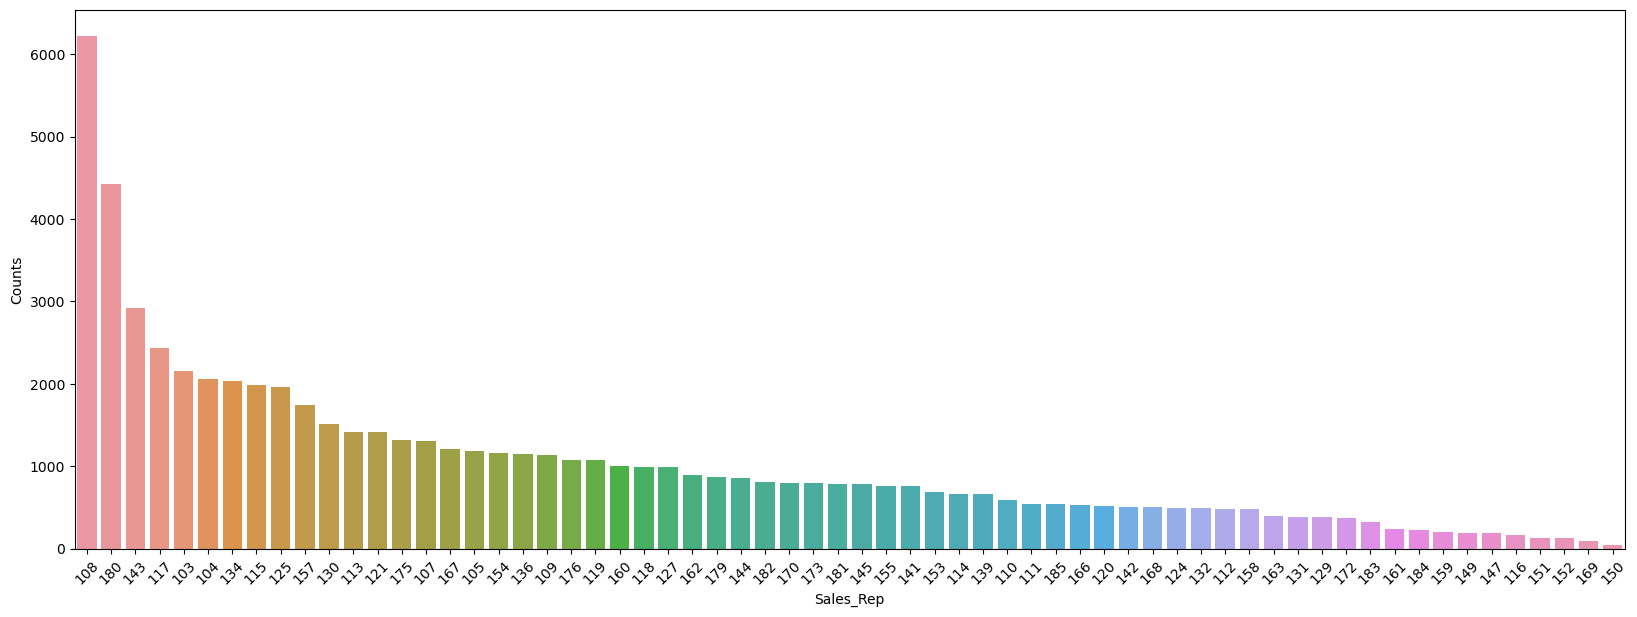

In [32]:
sales_rep_counts = sales_rep_counts.sort_values(by="Counts", ascending=False)

# Create Bar Plot
plt.figure(figsize=(20, 7))
ax = sns.barplot(x="Sales_Rep", y="Counts", data=sales_rep_counts,order=sales_rep_counts.Sales_Rep)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show Plot
plt.show()

Sales Rep "108" were used most often while sales rep "150" has been used the least.

Monthly Records:

In [33]:
Monthly_sales = sales_data2.groupby(['Invoice_Year','Invoice_Month', 'Invoice_Day']).sum().reset_index()
Monthly_sales.iloc[:,5:].describe()

C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\1104037687.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Monthly_sales = sales_data2.groupby(['Invoice_Year','Invoice_Month', 'Invoice_Day']).sum().reset_index()


,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price
count,559.000000,5.590000e+02,5.590000e+02,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000
mean,5265.100179,3.330606e+05,5.497543e+05,2.166936e+05,139085.598104,193975.037460,16047.737030,60107.322493,33129.542955
std,4781.446852,2.302029e+05,3.889102e+05,1.820148e+05,97025.658453,136009.114595,8053.152096,31837.470162,17179.486867
min,4.000000,5.433650e+03,0.000000e+00,-2.555238e+05,2349.360000,0.000000,345.000000,0.000000,1063.117667
25%,2106.500000,1.572531e+05,2.560595e+05,8.888978e+04,62655.095000,92237.325000,10063.000000,40370.544400,22084.687514
50%,3118.000000,2.688299e+05,4.487250e+05,1.630951e+05,113446.860000,150428.990000,14666.000000,54665.030000,30440.440019
75%,6577.000000,4.696801e+05,7.178838e+05,2.891977e+05,195474.320000,267013.720000,19652.500000,72573.307400,41211.201040
max,23710.000000,1.379283e+06,2.408920e+06,1.029636e+06,619085.330000,760197.860000,55866.000000,231196.720800,128415.923388


**************************************************Monthly Sales Trend in 2017**************************************************


<Figure size 800x2000 with 0 Axes>

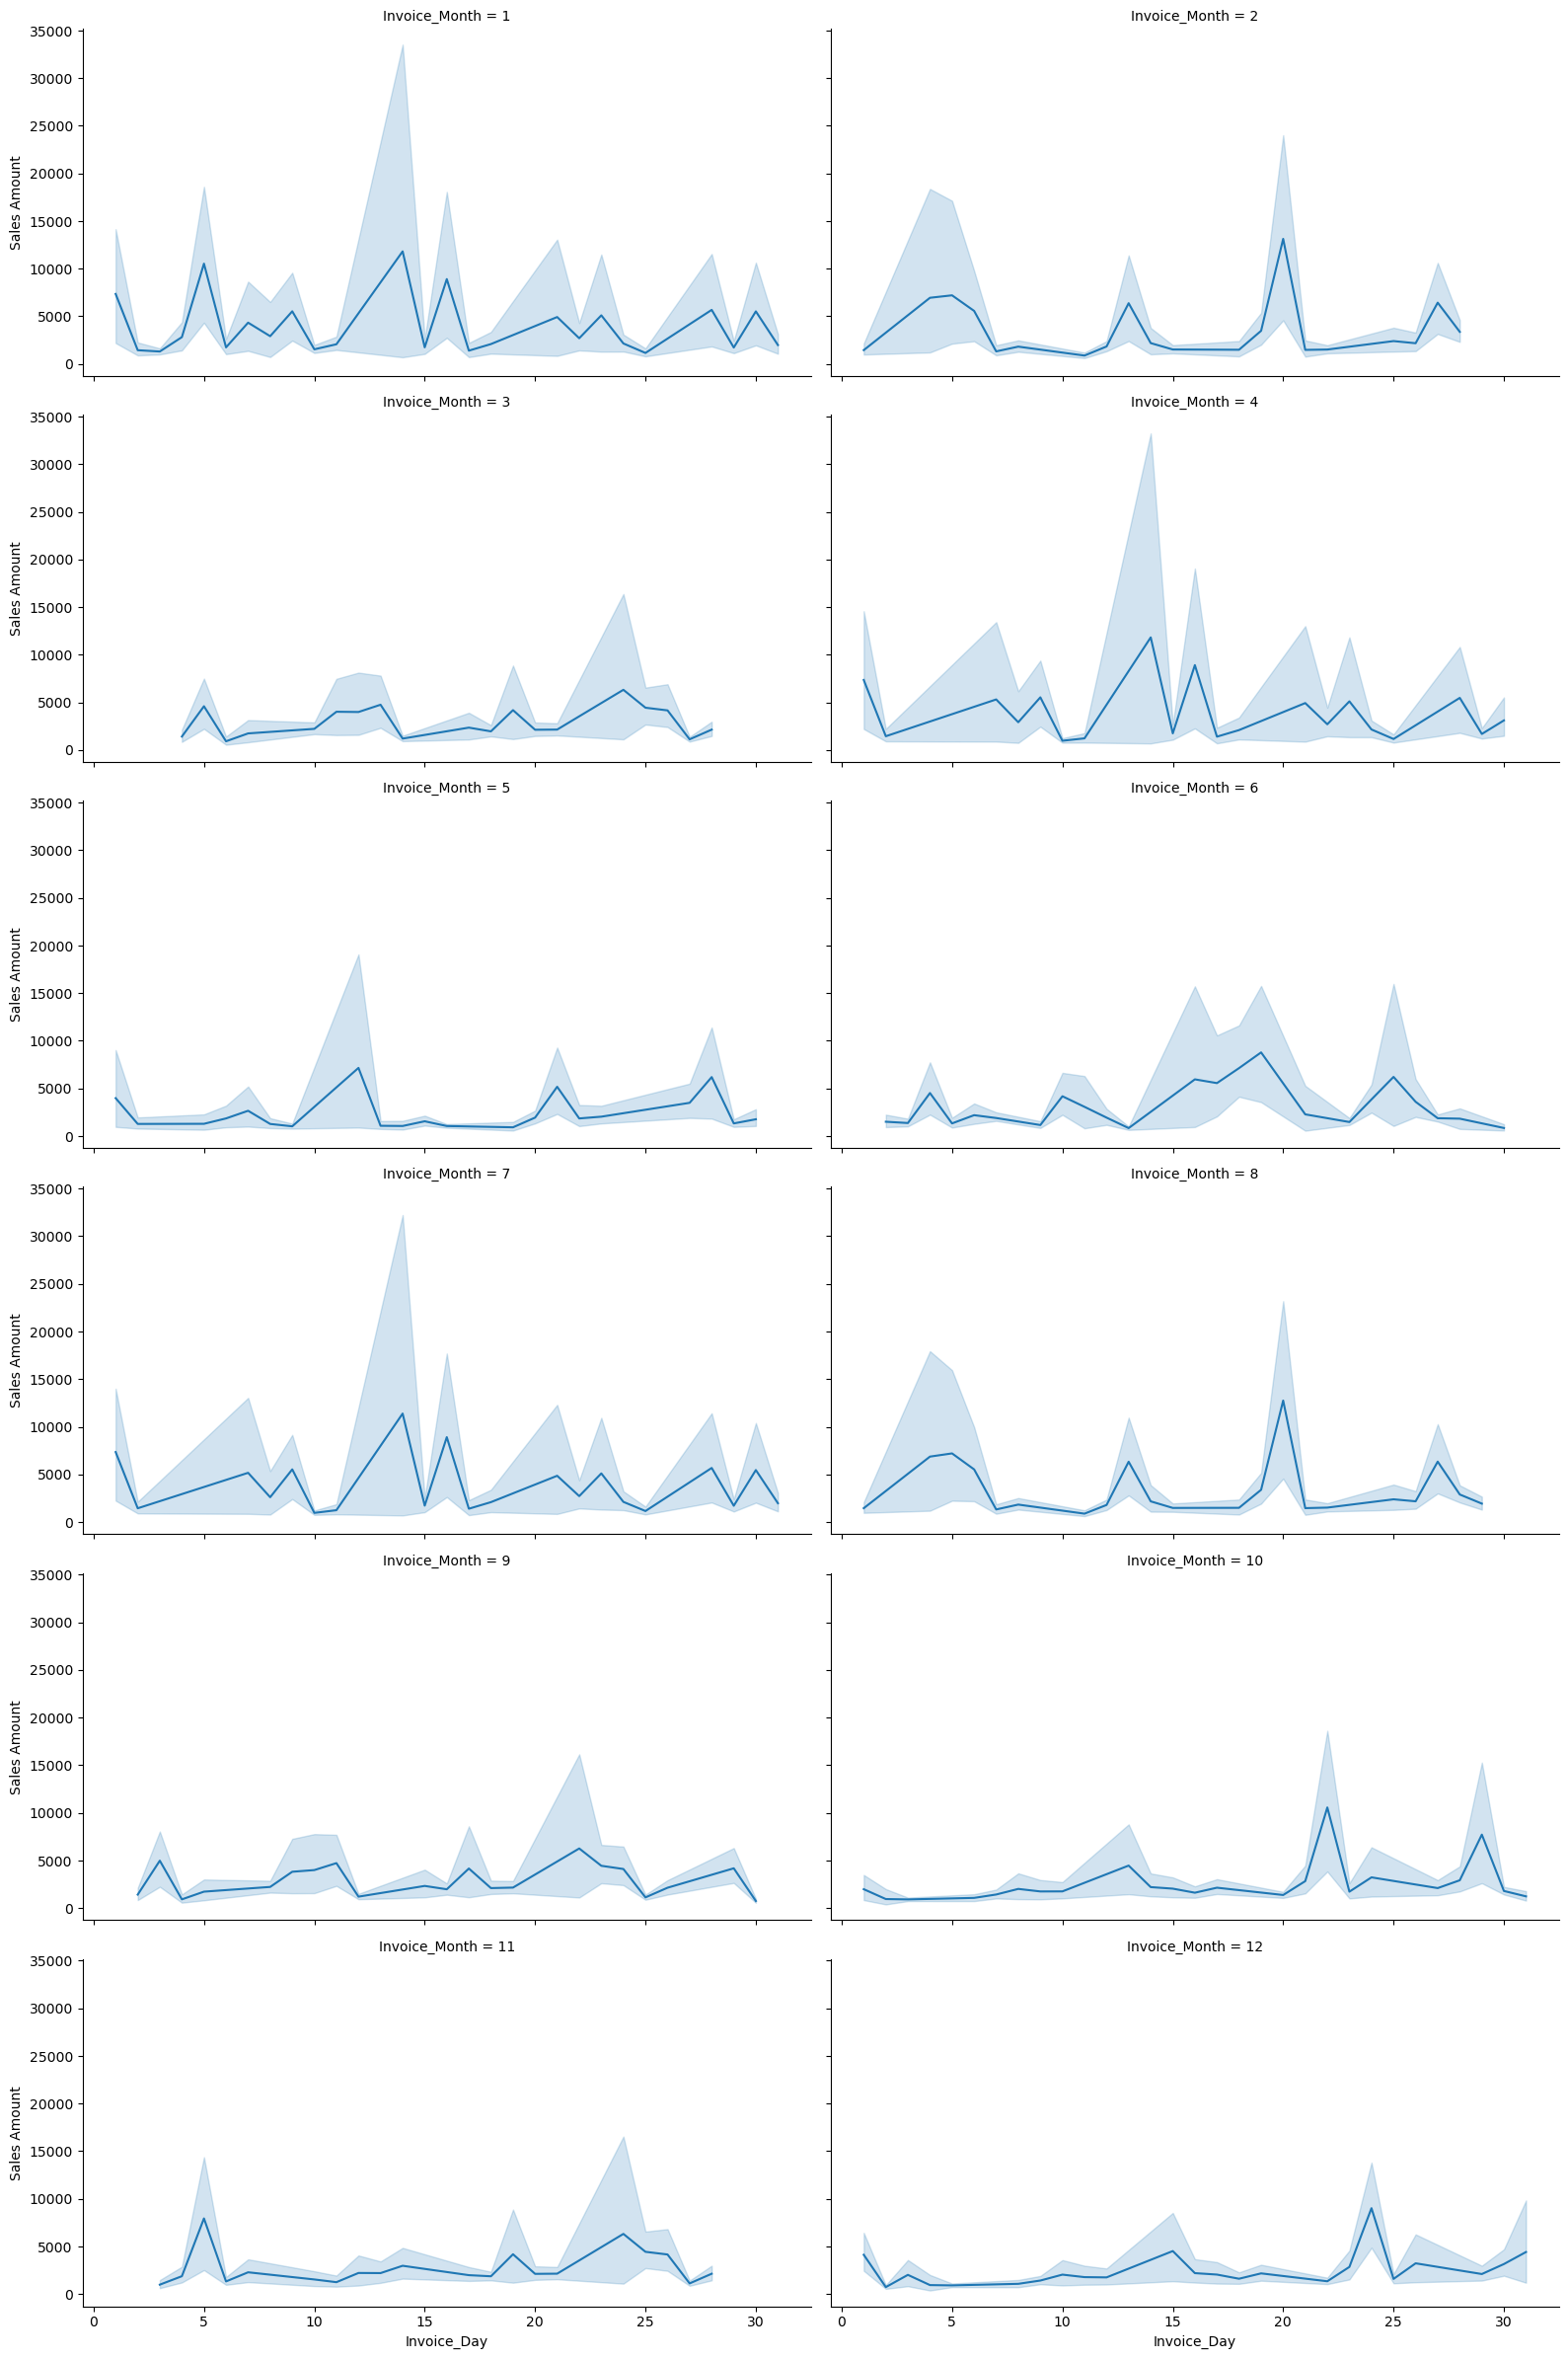

In [34]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data= sales_data2.query('Invoice_Year == 2017'),
            kind = 'line', col = 'Invoice_Month', col_wrap =2, height = 4, aspect = 2)
plt.ylabel('Sales Amount')
print('*'*50+'Monthly Sales Trend in 2017'+'*'*50)

**************************************************Monthly Sales Trend in 2018**************************************************


<Figure size 800x2000 with 0 Axes>

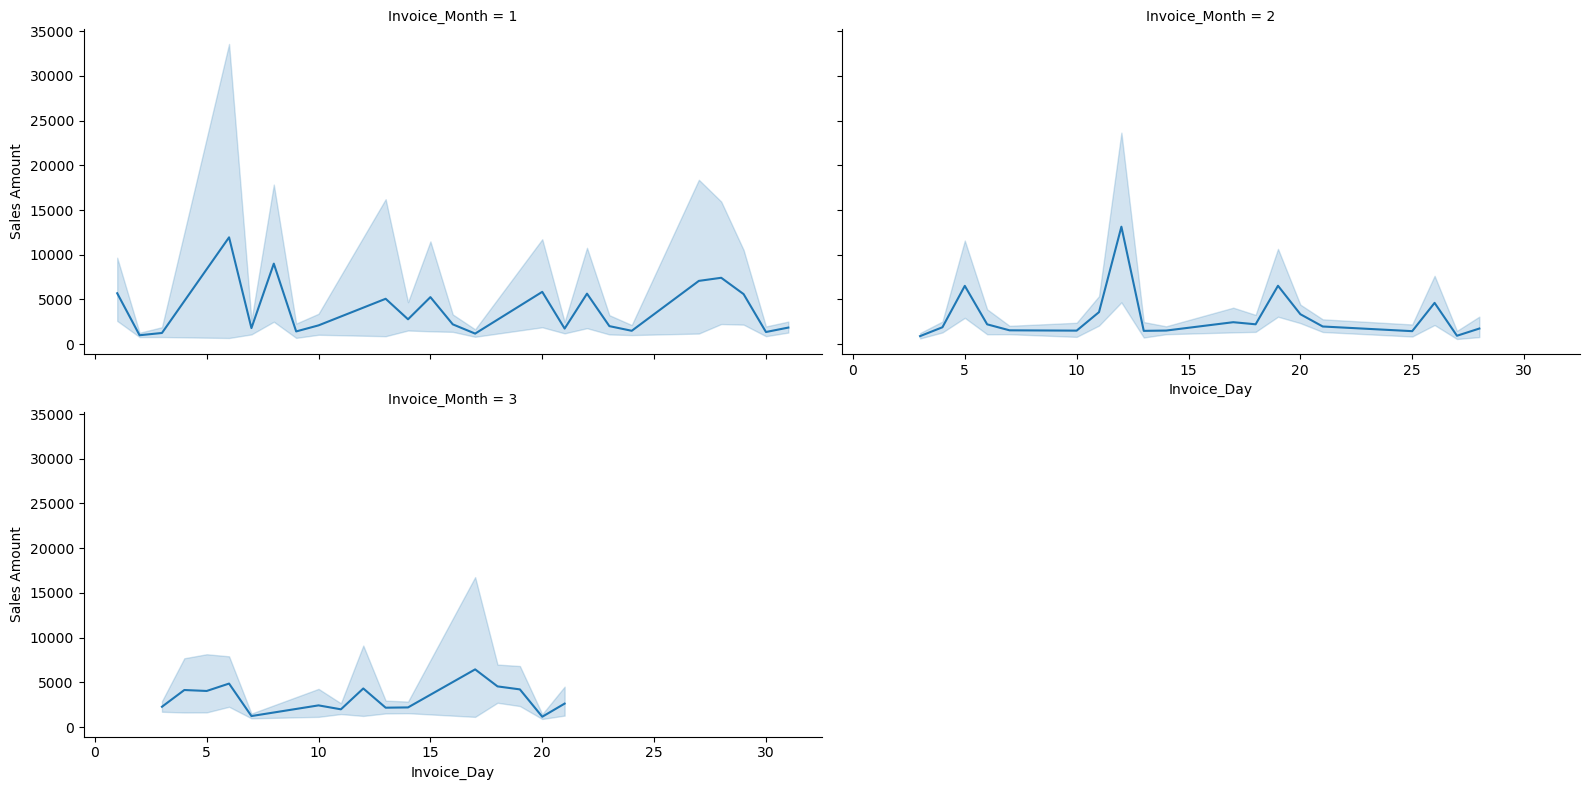

In [35]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data= sales_data2.query('Invoice_Year == 2018'),
            kind = 'line', col = 'Invoice_Month', col_wrap =2, height = 4, aspect = 2)
plt.ylabel('Sales Amount')
print('*'*50+'Monthly Sales Trend in 2018'+'*'*50)

**************************************************Monthly Sales Trend in 2019**************************************************


<Figure size 800x2000 with 0 Axes>

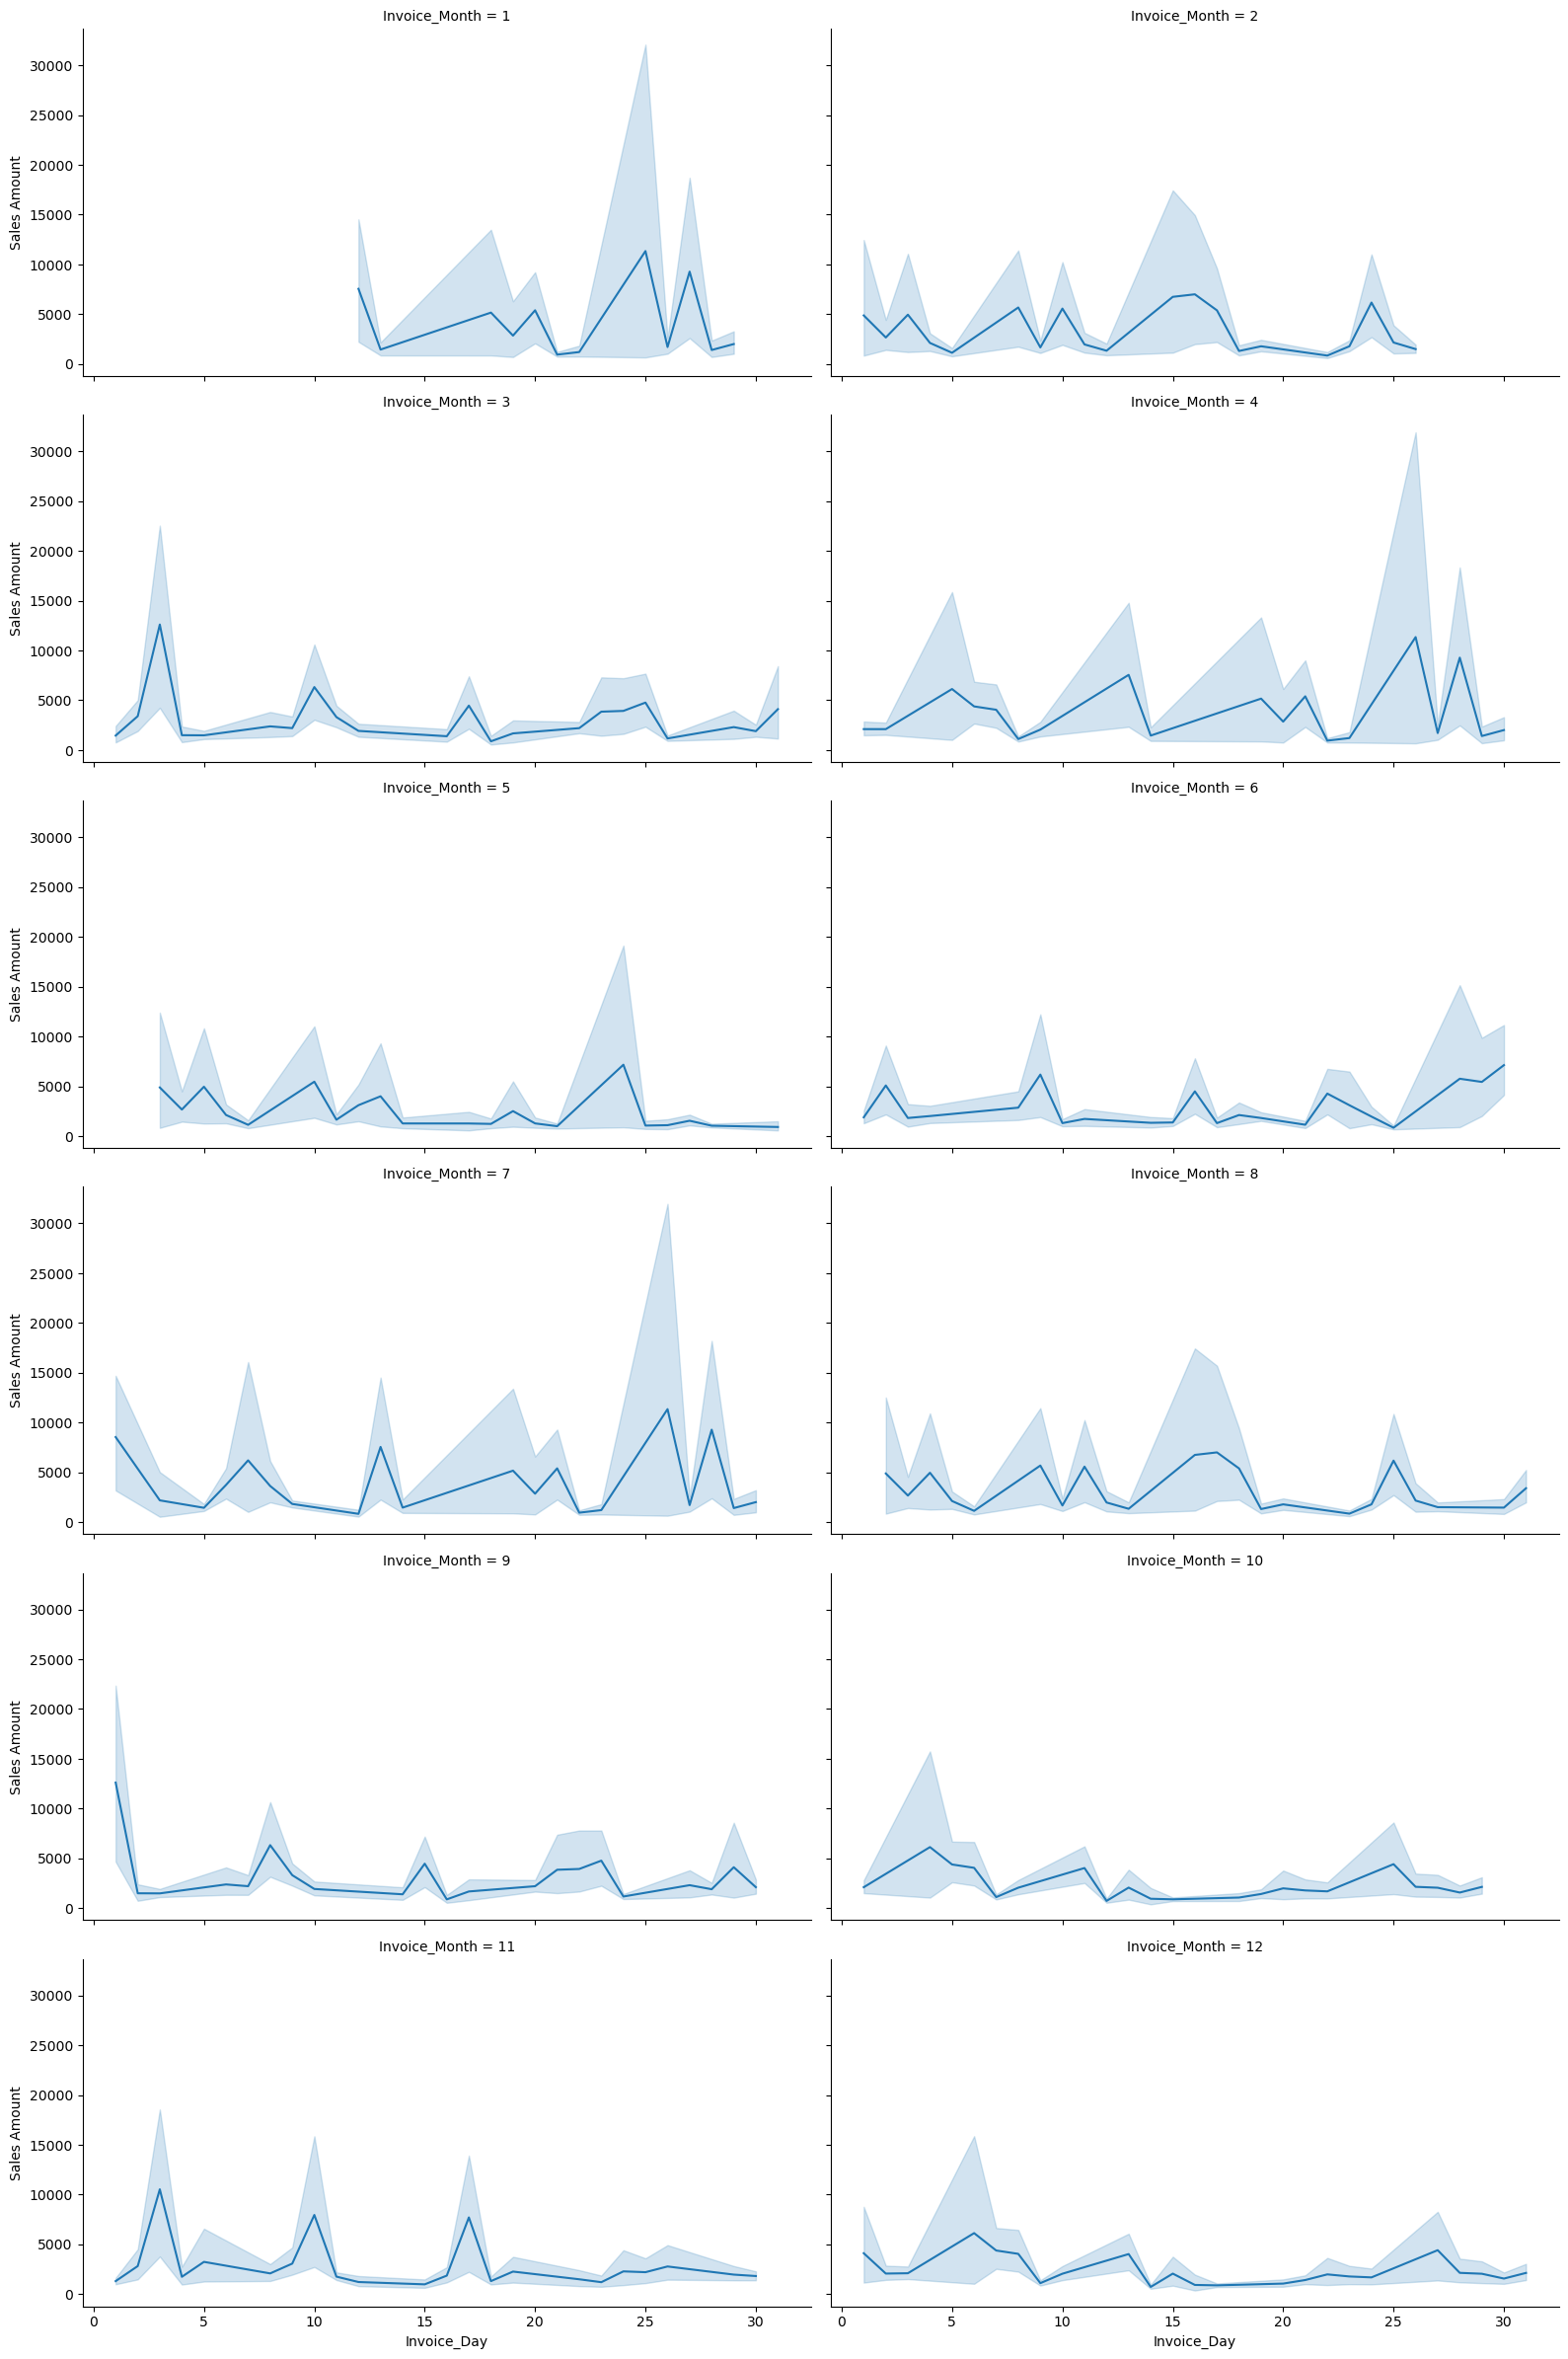

In [36]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data= sales_data2.query('Invoice_Year == 2019'),
            kind = 'line', col = 'Invoice_Month', col_wrap =2, height = 4, aspect = 2)
plt.ylabel('Sales Amount')
print('*'*50+'Monthly Sales Trend in 2019'+'*'*50)

Profit Records:

In [37]:
monthly_yearly_profit = Yearly_Sales.groupby(['Invoice_Year' , 'Invoice_Month'],as_index=False).sum()
monthly_yearly_sales['Year_Month'] = monthly_yearly_sales['Invoice_Year'].astype(str) + "-" + monthly_yearly_sales['Invoice_Month'].astype(str)
monthly_yearly_sales[['Year_Month' , 'Invoice_Year' , 'Invoice_Month' , 'Sales Margin Amount']]

C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\3675030622.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_yearly_profit = Yearly_Sales.groupby(['Invoice_Year' , 'Invoice_Month'],as_index=False).sum()


,Year_Month,Invoice_Year,Invoice_Month,Sales Margin Amount
0,2017-1,2017,1,3608608.66
1,2017-2,2017,2,3058428.41
2,2017-3,2017,3,3238303.63
3,2017-4,2017,4,2411999.06
4,2017-5,2017,5,2623243.73
5,2017-6,2017,6,3730692.09
6,2017-7,2017,7,2736051.16
7,2017-8,2017,8,3314770.23
8,2017-9,2017,9,3810222.27
9,2017-10,2017,10,2691692.34


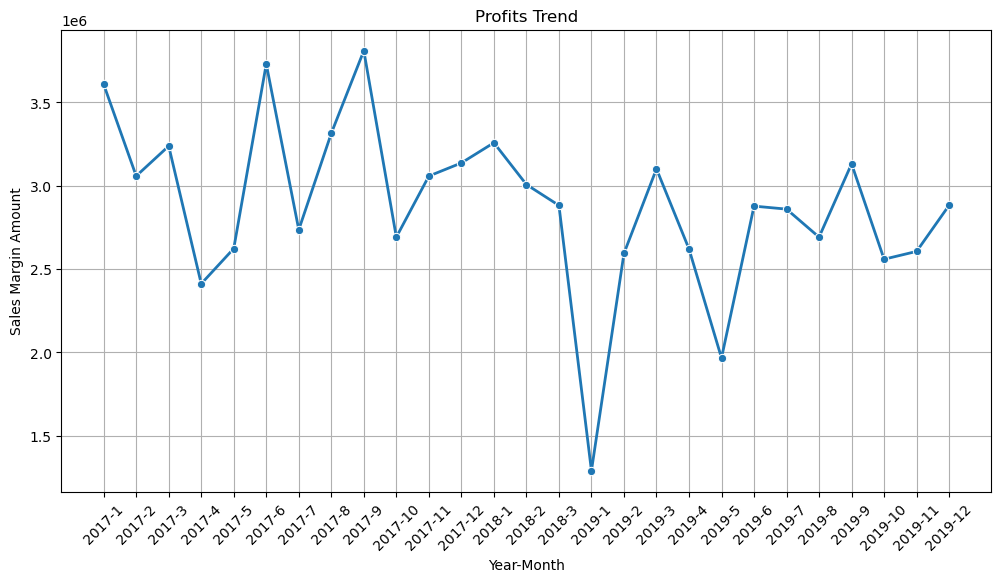

In [38]:

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_yearly_sales, x="Year_Month", y="Sales Margin Amount", marker="o", linewidth=2)

# Improve visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Year-Month")
plt.ylabel("Sales Margin Amount")
plt.title("Profits Trend")
plt.grid(True)  # Add grid for better readability

# Show plot
plt.show()


C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\381293881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Yearly_Sales01 = Yearly_Sales.groupby('Invoice_Year' , as_index = False).sum().sort_values(by='Sales Margin Amount',ascending = False)


,Invoice_Year,Sales Margin Amount
0,2017,37419000.55
2,2019,31182301.05
1,2018,9147547.74


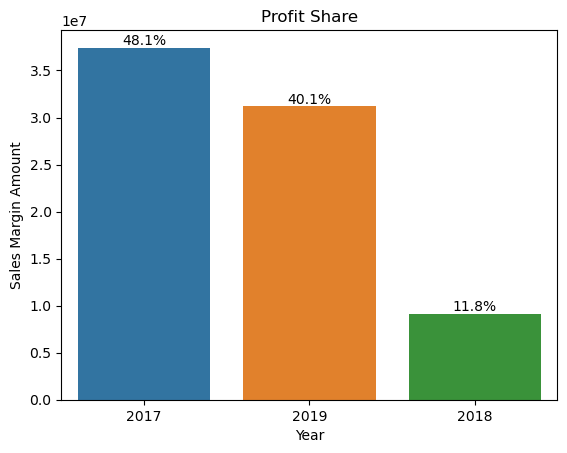

In [39]:
Yearly_Sales01 = Yearly_Sales.groupby('Invoice_Year' , as_index = False).sum().sort_values(by='Sales Margin Amount',ascending = False)
ax=sns.barplot(y = 'Sales Margin Amount', x = 'Invoice_Year', data = Yearly_Sales01 , order=Yearly_Sales01.Invoice_Year)
plt.xlabel('Year')
plt.ylabel('Sales Margin Amount')
plt.title('Profit Share')
total_sales = Yearly_Sales['Sales Margin Amount'].sum()
for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(v.get_height()/total_sales)*100:.1f}%' for v in bars])
Yearly_Sales01[['Invoice_Year', 'Sales Margin Amount']]

Top 10 Records:

In [40]:
Top10byCustKey17 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2017].groupby(['Invoice_Year','Custkey']).sum()
total_sales = Top10byCustKey17['Sales Margin Amount'].sum()
Top10byCustKey17 = Top10byCustKey17.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\3474621214.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top10byCustKey17 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2017].groupby(['Invoice_Year','Custkey']).sum()


C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\55742707.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top10byCustKey171 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2017].groupby(['Invoice_Year','Custkey']).sum()


,Custkey,Sales Margin Amount
0,10021485,5176926.16
1,10025024,3250809.87
2,10025052,1761731.21
3,10025919,1415771.68
4,10025241,1267256.40
5,10023023,870216.36
6,10020184,843138.90
7,10009606,835041.55
8,10012715,782863.50
9,10023715,729615.06


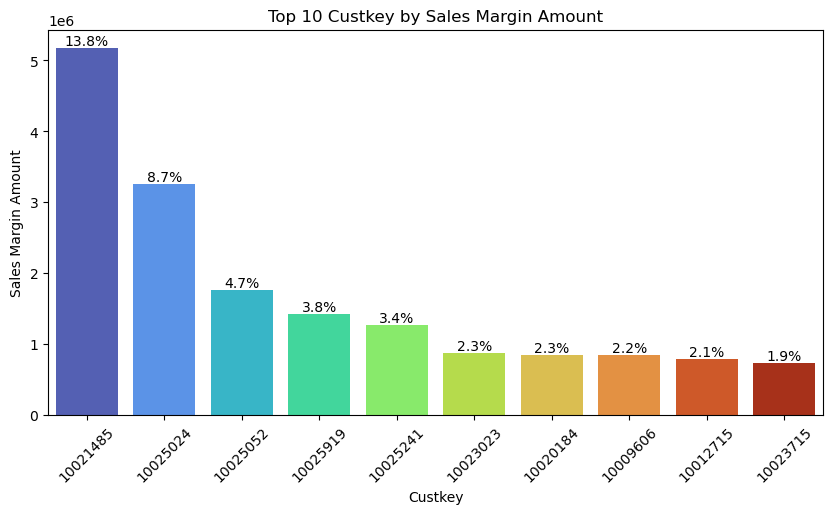

In [41]:
Top10byCustKey171 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2017].groupby(['Invoice_Year','Custkey']).sum()

plt.figure(figsize=(10,5))
ax = sns.barplot(x='Custkey', y='Sales Margin Amount',data = Top10byCustKey17, palette = 'turbo',
            order = Top10byCustKey17.Custkey)
plt.xticks(rotation=45)
plt.title('Top 10 Custkey by Sales Margin Amount')
total_sales = Top10byCustKey171['Sales Margin Amount'].sum()
for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(v.get_height()/total_sales)*100:.1f}%' for v in bars])
Top10byCustKey17[['Custkey', 'Sales Margin Amount']]

Observations:
Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10021485 contributed around 30.57% of the Sales Margin Amount in 2017.

In [42]:
Top10byCustKey18 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2018].groupby(['Invoice_Year','Custkey']).sum()
Top10byCustKey18 = Top10byCustKey18.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\2228671282.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top10byCustKey18 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2018].groupby(['Invoice_Year','Custkey']).sum()


C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\2712089447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top10byCustKey181 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2018].groupby(['Invoice_Year','Custkey']).sum()


,Custkey,Sales Margin Amount
0,10021485,5176926.16
1,10025024,3250809.87
2,10025052,1761731.21
3,10025919,1415771.68
4,10025241,1267256.40
5,10023023,870216.36
6,10020184,843138.90
7,10009606,835041.55
8,10012715,782863.50
9,10023715,729615.06


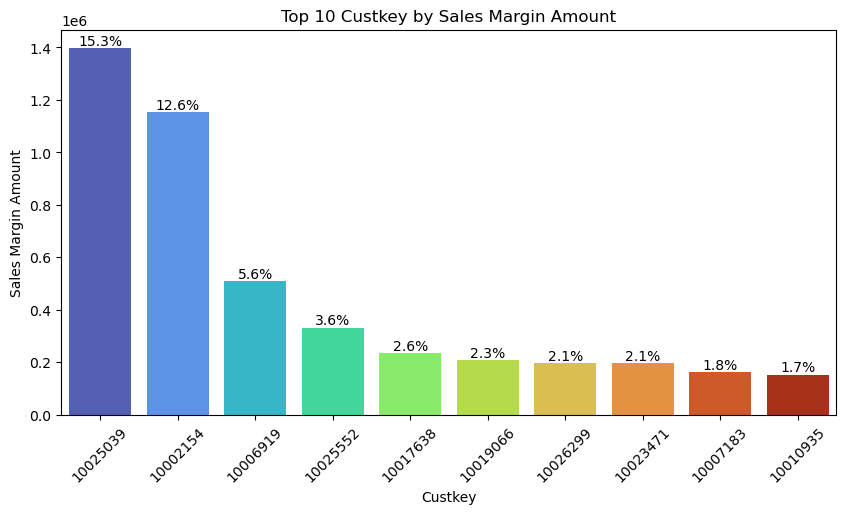

In [43]:
Top10byCustKey181 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2018].groupby(['Invoice_Year','Custkey']).sum()

plt.figure(figsize=(10,5))
ax = sns.barplot(x='Custkey', y='Sales Margin Amount',data = Top10byCustKey18, palette = 'turbo',
            order = Top10byCustKey18.Custkey)
plt.xticks(rotation=45)
plt.title('Top 10 Custkey by Sales Margin Amount')
total_sales = Top10byCustKey181['Sales Margin Amount'].sum()
for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(v.get_height()/total_sales)*100:.1f}%' for v in bars])
Top10byCustKey17[['Custkey', 'Sales Margin Amount']]

Observations:
Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10025039 contributed around 30.79% of the Sales Margin Amount in 2018.

In [44]:
Top10byCustKey19 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2019].groupby(['Invoice_Year','Custkey']).sum()
Top10byCustKey19 = Top10byCustKey19.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\250000624.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top10byCustKey19 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2019].groupby(['Invoice_Year','Custkey']).sum()


C:\Users\vkyad\AppData\Local\Temp\ipykernel_30680\374166605.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top10byCustKey191 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2019].groupby(['Invoice_Year','Custkey']).sum()


,Custkey,Sales Margin Amount
0,10021485,5176926.16
1,10025024,3250809.87
2,10025052,1761731.21
3,10025919,1415771.68
4,10025241,1267256.40
5,10023023,870216.36
6,10020184,843138.90
7,10009606,835041.55
8,10012715,782863.50
9,10023715,729615.06


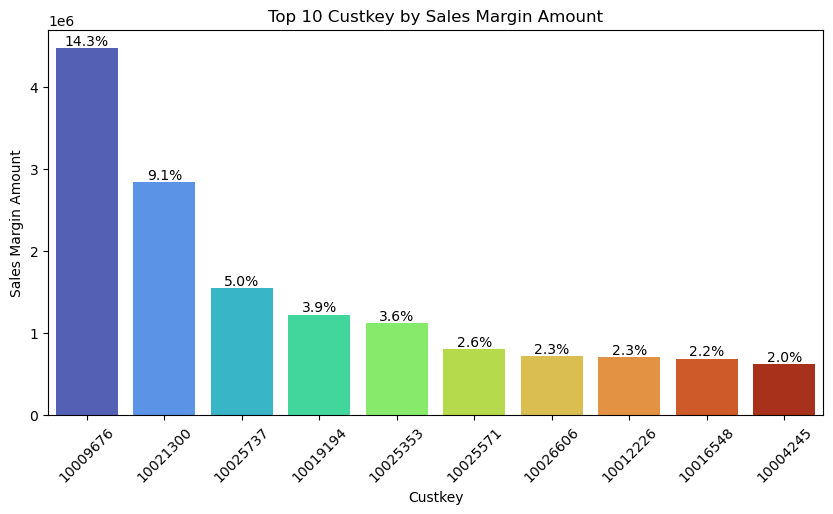

In [45]:
Top10byCustKey191 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2019].groupby(['Invoice_Year','Custkey']).sum()

plt.figure(figsize=(10,5))
ax = sns.barplot(x='Custkey', y='Sales Margin Amount',data = Top10byCustKey19, palette = 'turbo',
            order = Top10byCustKey19.Custkey)
plt.xticks(rotation=45)
plt.title('Top 10 Custkey by Sales Margin Amount')
total_sales = Top10byCustKey191['Sales Margin Amount'].sum()
for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{(v.get_height()/total_sales)*100:.1f}%' for v in bars])
Top10byCustKey17[['Custkey', 'Sales Margin Amount']]

Observations:
Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10009676 contributed around 30.41% of the Sales Margin Amount in 2019.